### Calculate the luminosity during each segment

$L_{\gamma} = 4\pi D_L ^2 \int_{E_{min}}^{E_{max}} E \dfrac{dN}{dE} dE$

$D_L = 134.1$ $Mpc$

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

In [2]:
import astropy.io


dir = '3B-20180206-20180622/'

lc_file_path = 'Output/Light_curve_001/4fgl_j0854.8+2006_lightcurve.fits'
emin = 0.1 # GeV
emax = 300 # GeV

hdul = fits.open('./' + dir+lc_file_path)

In [3]:
hdul.info()

Filename: ./3B-20180206-20180622/Output/Light_curve_001/4fgl_j0854.8+2006_lightcurve.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  LIGHTCURVE    1 BinTableHDU    251   8R x 109C   [D, D, D, D, D, D, L, L, K, K, K, 320A, 320A, 10D, 10D, 10D, 10D, D, D, D, D, 20D, 20D, 20D, 20D, 20D, 20D, 20D, 20D, 20D, 20D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [4]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3290 / length of dimension 1                          
NAXIS2  =                    8 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  109 / number of table fields                         
TTYPE1  = 'tmin    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 's       '                                                            
TTYPE2  = 'tmax    '                                                            
TFORM2  = 'D       '        

In [11]:
lc = hdul[1].data

In [14]:
Table(lc).colnames

['tmin',
 'tmax',
 'tmin_mjd',
 'tmax_mjd',
 'loglike_const',
 'flux_const',
 'fit_success',
 'fit_success_fixed',
 'fit_status',
 'fit_quality',
 'num_free_params',
 'param_names',
 'param_names_fixed',
 'param_values',
 'param_values_fixed',
 'param_errors',
 'param_errors_fixed',
 'ts',
 'ts_fixed',
 'loglike',
 'loglike_fixed',
 'loglike_scan',
 'loglike_scan_fixed',
 'dloglike_scan',
 'dloglike_scan_fixed',
 'eflux_scan',
 'eflux_scan_fixed',
 'flux_scan',
 'flux_scan_fixed',
 'norm_scan',
 'norm_scan_fixed',
 'npred',
 'npred_fixed',
 'npred_wt',
 'npred_wt_fixed',
 'pivot_energy',
 'pivot_energy_fixed',
 'flux',
 'flux_fixed',
 'flux100',
 'flux100_fixed',
 'flux1000',
 'flux1000_fixed',
 'flux10000',
 'flux10000_fixed',
 'flux_err',
 'flux_err_fixed',
 'flux100_err',
 'flux100_err_fixed',
 'flux1000_err',
 'flux1000_err_fixed',
 'flux10000_err',
 'flux10000_err_fixed',
 'flux_ul95',
 'flux_ul95_fixed',
 'flux100_ul95',
 'flux100_ul95_fixed',
 'flux1000_ul95',
 'flux1000_ul95_fi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


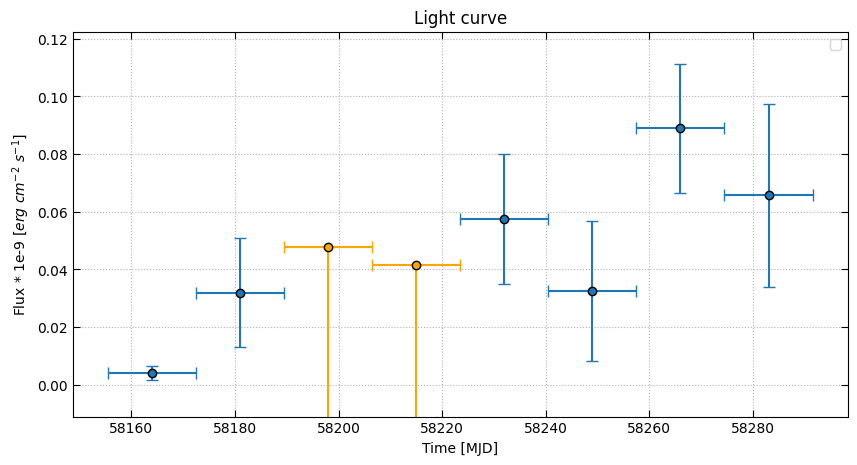

In [10]:
flux = lc[1]['flux']
flux_err = lc[1]['flux_err']

tmean = (lc['tmin_mjd'] + lc['tmax_mjd'])/2
TSmin = 9

if len(lc['eflux'][lc['ts']>TSmin]) > 0:
    scale = int(np.log10(lc['eflux'][lc['ts']>TSmin].max())) -2
else:
    scale = int(np.log10(lc['eflux_ul95'].max())) -2

f = plt.figure(figsize=(10, 5))
ax = f.add_subplot(111)
ax.tick_params(which='major', length=5, direction='in')
ax.tick_params(which='minor', length=2.5, direction='in',bottom=True, top=True, left=True, right=True)
ax.tick_params(bottom=True, top=True, left=True, right=True)
plt.errorbar(tmean[lc['ts']>TSmin], (10**-scale)*lc['flux'][lc['ts']>TSmin], xerr = [ tmean[lc['ts']>TSmin]- lc['tmin_mjd'][lc['ts']>TSmin], lc['tmax_mjd'][lc['ts']>TSmin] - tmean[lc['ts']>TSmin] ], yerr=(10**-scale)*lc['flux_err'][lc['ts']>TSmin], markeredgecolor='black', fmt='o', capsize=4)
plt.errorbar(tmean[lc['ts']<=TSmin], (10**-scale)*lc['flux_ul95'][lc['ts']<=TSmin], xerr = [ tmean[lc['ts']<=TSmin]- lc['tmin_mjd'][lc['ts']<=TSmin], lc['tmax_mjd'][lc['ts']<=TSmin] - tmean[lc['ts']<=TSmin] ], yerr=5*np.ones(len(lc['flux_err'][lc['ts']<=TSmin])), markeredgecolor='black', fmt='o', uplims=True, color='orange', capsize=4)
plt.xlabel('Time [MJD]')
plt.ylabel('Flux * 1e-9 [$erg$ $cm^{-2}$ $s^{-1}$]')

if len(lc['flux'][lc['ts']>TSmin]) > 0:
    y0 = (lc['flux'][lc['ts']>TSmin]).max()
    y1 = (lc['flux'][lc['ts']>TSmin] + lc['flux_err'][lc['ts']>TSmin]).max()
    if y1 > 4*y0:
        y1 = 4*y0
    
    if len(lc['flux_ul95'][lc['ts']<=TSmin]) > 0:
        y2 = (lc['flux_ul95'][lc['ts']<=TSmin]).max()
        if y2 > y1:
            y1 = y2
    
else:
    y1 = (lc['flux_ul95'][lc['ts']<=TSmin]).max()



ymin = -(10**-scale)*0.1*y1               
plt.ylim(ymin,(10**-scale)*1.1*y1)
plt.legend()
plt.title('Light curve')

ax.grid(linestyle=':',which='both')
plt.show()

In [ ]:
!which python3

/bin/python3
